In [48]:
#Import and load the Boston housing dataset which is built in scikit-learn
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [49]:
#Import pandas to create pandas DataFrame for easier manipulations
import pandas as pd
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [50]:
#Add the target into the DataFrame
boston['MEDV'] = boston_dataset.target

In [51]:
#Inspect the data set
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
boston.shape

(506, 14)

In [53]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [54]:
#Check the summary statistics rounded to the second decimal place
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


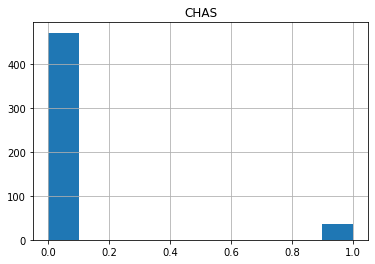

In [55]:
#Visualize and inspect the distribution ideally column by column
import numpy as np
import matplotlib.pyplot as plt
boston.hist(column='CHAS')
plt.savefig("plot1.png")
plt.show()

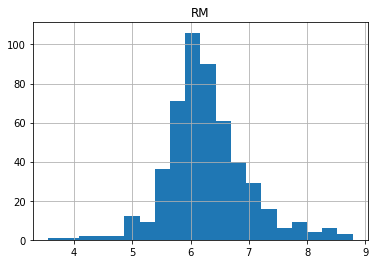

In [56]:
boston.hist(column='RM', bins=20)
plt.savefig("plot1.png")
plt.show()

In [57]:
#Construct a correlation matrix to understand the relationship among features
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

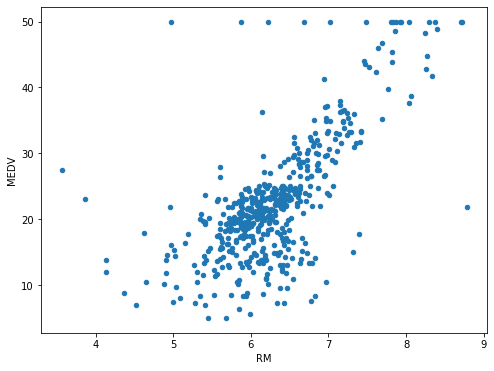

In [58]:
#Data preparation - feature selection
#RM and MEDV are positively correlated
#Display the relationship between the two features using scatter plot
boston.plot(kind = 'scatter', x = 'RM', y = 'MEDV', figsize = (8, 6))
plt.savefig("plot1.png")
plt.show()

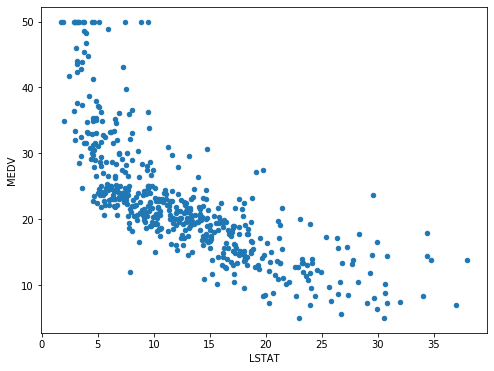

In [59]:
#LSTAT and MEDV tend to be negatitively correlated
#Display the relationship between the two features using scatter plot
boston.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV', figsize = (8, 6))
plt.savefig("plot1.png")
plt.show()

In [60]:
#RM appears a better choice for predicting MEDV and start with a univariate linear regression: MEDV = b + m * RM
#In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a
#1dimensional target array (Y)
#Data prep for 2dimensional data structure (X)
X = boston[['RM']]
print(X.shape)

(506, 1)


In [61]:
#Similarly, define 1dimensional target (Y)
Y = boston['MEDV']
print(Y.shape)

(506,)


In [62]:
#Import LinearRegression class
from sklearn.linear_model import LinearRegression

#Instantiate model
model = LinearRegression()

In [63]:
#Import train_test_split function to split data into training and testing sets to assess performance of the model on newly
#unseen data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [64]:
#Check the dimension to ensure the same number of rows
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


In [65]:
#Fit/Train the model using training data to find the linear regression coefficients, i.e., intercept and slope
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#Access the estimated intercept from the model rounded to the 2nd decimal place
model.intercept_.round(2)

-30.57

In [67]:
#Access the estimated coefficient of feature RM
model.coef_.round(2)

array([8.46])

In [68]:
#Finally, the fitted model is as follows:
#MEDV = -30.57 + 8.46 * RM
#For one unit increase in RM, the median home price would go up by $8460

In [69]:
#Import numpy
import numpy as np
#Predict with new data
#Make sure it is 2d
new_RM = np.array([6.5]).reshape(-1, 1)
model.predict(new_RM)
#When the average number of rooms per dwelling is 6.5, the model predicts a home value of $24,426.06

array([24.42606323])

In [70]:
#Calculate the value by plugging in the line b + m*x where b is the estimated intercept and m is the estimated slope
model.intercept_ + model.coef_*6.5

array([24.42606323])

In [71]:
#Feed the testing set and predict for all homes
y_test_predicted = model.predict(X_test)
y_test_predicted.shape

(152,)

In [72]:
Y_test.shape

(152,)

In [73]:
type(y_test_predicted)

numpy.ndarray

<function matplotlib.pyplot.show(*args, **kw)>

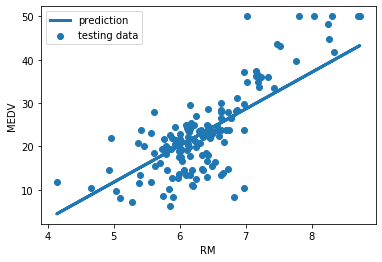

In [74]:
#Examine model performance by visualization comparing the fitted line and the true observations in the test set
plt.scatter(X_test, Y_test, label='testing data'); plt.plot(X_test, y_test_predicted, label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show

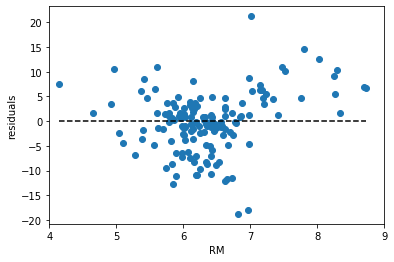

In [75]:
#Evaluate the model by measuring the distance (referred to as residual or error) 
#between a point to the line along the vertical line
#A residual is the difference between the observed value of the target and the predicted value
#The closer the residual is to 0, the better job the model is doing
#Calculate a residual and represent it in a scatter plot
residuals = Y_test - y_test_predicted

#Plot the residuals
plt.scatter(X_test, residuals)
#Plot a horizontal line at y = 0
plt.hlines(y = 0, xmin = X_test.min(), xmax = X_test.max(), linestyle = '--')
#Set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.savefig("plot1.png")
plt.show()

#Ideally, the residuals should be symmetrically and randomly spaced around the horizontal axis
#If the residual plot shows some pattern, linear or nonlinear, that's an indication that out model has room for improvement
#Residual plots can reveal bias from the model and statistical measures indicate goodness-of-fit

In [76]:
#A good fit is when each residual is near 0
#Aggregate the residuals and report one metric as a measure of model performance
residuals.mean()

-0.23645087766388434

In [77]:
#Mean of residuals is an inaccurate metric as residuals can be positive or negative
#Hence, take a square of each residual and then take the mean of squares - mean squared error (MSE)
(residuals**2).mean()

36.51721473083862

In [78]:
#Alternatively, use mean_squared_error() to output the same result
#The smaller the MSE, the better, yet there is no absolute good or bad threshold
#It can be defined based on the dependent variable, i.e., MEDV in the test set such as variance
#To make the scale of errors to be the same as the scale of targets, root mean squared error(RMSE) is often used
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

In [79]:
#Another common metric to evaluate model performance is called R-squared
#It is the proportion of total variation explained by the model
model.score(X_test, Y_test)

0.6015774471545622

In [80]:
#Calculate the total variation - the sum of squares of the difference between the response and the mean of response
((Y_test - Y_test.mean())**2).sum()

13931.482039473683

In [81]:
#Calculate the variation that the model fails to capture - the sum of squares of residuals
(residuals**2).sum()

5550.616639087471

In [82]:
#Calculate the proportion of total variation from the data
1 - 5550.616639087471/13931.482039473683

0.6015774471545622

In [83]:
#Build multivariate linear regression model where MEDV depends on both RM (the average number of rooms)
#and LSTAT (% lower status in population)
#MEDV = b0 + b1 * RM + b2 * LSTAT
#Data preparation
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
#Train test split
#Same random_state to ensure the same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
model2.intercept_

5.316818471096056

In [85]:
model2.coef_

array([ 4.12674118, -0.67762654])

In [86]:
#The second model is
#MEDV = 5.32 + 4.13 * RM + (-0.68) * LSTAT
#Predict using second model
y_test_predicted2 = model2.predict(X2_test)
print(y_test_predicted2)

[28.478341   28.08411889 17.46168887 24.08502818 20.53939027 24.07720618
 29.49226779 21.53814087 17.73198767 25.82822684 27.92749205 30.56017902
 19.744675   22.25937394 22.23039758 20.23997311 17.00747983 38.18522442
 25.71103246  5.63483384 21.06717172 17.25963598 26.12875354 27.64278875
 28.10950458 13.1207732  16.69050892 22.99963249 31.4303435  13.43144011
 28.74647902 15.93821689 36.51949271 19.97289731 24.51189106 20.56294206
 19.42950819 31.19888826  6.57747007 20.39686851 26.47769159 26.7825762
 27.47762993 14.41499805 18.62310619 18.06847281 36.21261023 18.53174991
 23.84655008 24.54542564 26.22034649 23.95166915 28.32133001 23.87204143
  6.22235564 27.39863295  9.1580405  26.52852129 20.09521683 36.67342818
 21.59540558 28.25221122 15.5348794  19.56003936  7.62687753 30.70623418
 38.04772217 26.44423625 23.06709024 21.58718845 27.19740561  5.35113993
 16.31106342 24.74072319 21.05360377 22.03423263 32.26426006 26.36981291
 27.17424345 32.40241397 21.42721859 23.18437379 31.

In [87]:
#Compare the models using MSE (mean squared error)
mean_squared_error(Y_test, y_test_predicted).round(2)

36.52

In [88]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93

In [89]:
#The second model has a lower MSE, specifically a 21% reduction ((36.52 - 28.93)/36.52 = 21%)
#In general, the more features the model includes, the lower the MSE would be
#Yet some features could be random noise, thus hurt the interpretability of the model